Постановка задачи
========
Дан лист бумаги размером size x size, внутрь которого вписана окружность. На этот лист бумаги случайным образом падает точка, которая может либо попасть в окружность, либо нет. Необходимо с помощью проведения некоторого числа бросков точки определить площадь круга. Данный файл содержит оценку количества бросков и количества экспериментов (повторных серий бросков)

Статистический анализ результатов
========================

In [31]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas

Инициализация переменных, аналитический расчет площади круга по формуле  $ S_{real} = {pi} \cdot R^2$ <br/> R = 5  <br />Центр окружности в точке (1, 2)

In [32]:
m, S = 0, 0
x_min = -4
y_min = -3
x_max =  6
y_max =  7
x0, y0 = 1, 2
circle_radius = 5
coord_x, coord_y, rand_x, rand_y = 0, 0, 0, 0
real_area = math.pi * circle_radius ** 2
results = dict()

Координаты x и y будут рассчитаны по формулам:
$$coord_x = rand_x * (x_{max} - x_{min}) + x_{min}$$
$$coord_y = rand_y * (y_{max} - y_{min}) + y_{min}$$
Принадлежность к окружности определяется за счет сравнения расстояния от центра окружности до точки (теорема Пифагора) и радиуса окружности. Если расстояние меньше, чем радиус, то точка принадлежит окружности.
$$\sqrt{(x - x_0)^2 + (y - y_0)^2} \le R$$
или 
$$(x - x_0)^2 + (y - y_0)^2 \le R^2$$
Этот фрагмент в коде ниже: <br />
`coord_x = rand_x * (x_max - x_min) + x_min` <br>
`coord_y = rand_y * (y_max - y_min) + y_min` <br>
`in_area = ((coord_x - x0)**2 + (coord_y - y0)**2 <= circle_radius**2)`

**n** изменяется от 10 до 3000 не включительно с шагом в 10 единиц. Внутри главного цикла описан второй, который проводит 15 экспериментов и собирает статистику, а именно: 
* самое большое отклонение, 
* среднее отклонение за 15 экспериментов, 
* один случайный (в данном случае просто последний) эксперимент.

Внутри второго цикла описан цикл с неиспользуемым значением "_"
, внутри которого ведется рассчет **n** точек, подсчет количества **m**, расчет площади круга и отклонений в результате эксперимента. 

Для хранения данных используется инициализированный ранее словарь **results**. Структура данных будет состоять из инициализированных словарей, помещенных в качестве значения в словарь **results**.
<br \>Структура словаря: 
{ключ: значение}, а доступ осуществляется через имя словаря `dict_name[key] # returns value`
<br \>Выглядеть структура будет следующим образом:

{<br \>
140: 
    
    {
    "area": 75.510204, 
    "error_abs": 3.0296, 
    "error_otn": "3.86%"
    }
}

Тогда доступ к экспериментально полученной площади будет осуществлен так: `results[140]["area"]`


In [39]:
"""n -- количество экспериментов"""
for n in range(10, 3000, 10):
    results[n] = dict()
    max_error = 0
    sum_error = 0
    max_error_area = 0
    """10 экспериментов для каждой выборки"""
    for j in range(15):
        m = 0
        error_abs = 0
        for _ in range(0, n):
            rand_x = random.random()
            rand_y = random.random()
            coord_x = rand_x * (x_max - x_min) + x_min
            coord_y = rand_y * (y_max - y_min) + y_min
            in_area = ((coord_x - x0)**2 + (coord_y - y0)**2 <= circle_radius**2)
            m += int(in_area)
        try:
            S = (m / n) * 100
        except:
            S = 0
        error_abs = math.fabs(real_area - S)
        error_random = error_abs
        error_area = S
        sum_error += error_abs
        if error_abs > max_error:
            max_error = error_abs
            error_otn = (max_error / real_area) * 100
            max_error_area = S
    
        
    average_error = sum_error / 15
    results[n]["max error area"] = max_error_area
    results[n]["random area"] = error_area
    percent = "{0:.3f}%".format(error_otn)
    results[n]["max error_abs"] = max_error
    results[n]["max error_otn"] = percent
    results[n]["random error"] = error_random
    results[n]["average error_abs"] = average_error
    results[n]["percent value"] = error_otn

In [21]:
#for key in results.keys():
#    print("n: ", key, "  area: {0:.3f}".format(results[key]["area"]), 
#          "error_abs: {0:.2f}".format(results[key]["error_abs"]), 
#          "  error_rel: ", results[key]["error_otn"], 
#          "  error_rand: {0:.2f}".format(results[key]["error"]))

KeyError: 'area'

In [40]:
show_results = results

In [41]:
pandas.DataFrame(results)

,10,20,30,40,50,60,70,80,90,100,...,2900,2910,2920,2930,2940,2950,2960,2970,2980,2990
average error_abs,7.82006,9.56932,4.62438,4.87463,5.23599,3.235,3.34809,3.48673,4.22648,3.36932,...,0.585413,0.688371,0.748658,0.866705,0.495798,0.698135,0.520769,0.519343,0.533406,0.569321
max error area,100,60,90,65,64,61.6667,68.5714,86.25,68.8889,88,...,77.4828,80,80.137,76.4846,79.6599,76.7119,80.6757,77.138,77.2819,77.4247
max error_abs,21.4602,18.5398,11.4602,13.5398,14.5398,16.8731,9.96839,7.71018,9.65093,9.46018,...,1.05706,1.46018,1.59717,2.05517,1.12005,1.82795,2.13586,1.40177,1.25794,1.11507
max error_otn,27.324%,23.606%,14.592%,17.239%,18.513%,21.484%,12.692%,9.817%,12.288%,12.045%,...,1.346%,1.859%,2.034%,2.617%,1.426%,2.327%,2.719%,1.785%,1.602%,1.420%
percent value,27.324,23.6056,14.5916,17.2394,18.5127,21.4836,12.6921,9.81691,12.2879,12.0451,...,1.34589,1.85916,2.03358,2.61673,1.42609,2.32742,2.71946,1.78479,1.60166,1.41975
random area,80,70,80,75,64,70,82.8571,78.75,77.7778,86,...,78.2759,78.1443,78.8014,79.1809,79.6599,78.7119,77.973,78.6869,77.2819,78.9298
random error,1.46018,8.53982,1.46018,3.53982,14.5398,8.53982,4.31733,0.210184,0.762039,7.46018,...,0.263954,0.395486,0.261554,0.641071,1.12005,0.172048,0.566843,0.147052,1.25794,0.38995


Ниже из словаря собираются результаты и данные для построения графиков:
1. x - количество точек эксперимента, используется во всех графиках как координата x
2. y - максимальное абсолютное отклонение, используется как величина столбцов в графике errorbar
3. error_area1 - значение площади по результатам случайного (последнего) эксперимента, используется как координата y для расстановки красных точек
4. av_error - среднее отклонение за 15 экспериментов, используется для расстановки точек цвета маджента
5. percents - попытка найти значение, когда погрешность становится терпимой. Используется для поиска значений index, index1 и index2, хранящих границы, когда появляются погрешности, меньшие, чем требуемые

In [42]:
x, y = list(), list()
error = list()
#a_error = list()
error_area1 = list()
av_error = []
percents = []
for key in results.keys():
    y.append(results[key]["max error_abs"])
    x.append(key)
    error.append(results[key]["random error"] + real_area)
    error_area1.append(results[key]["random area"])
    av_error.append(results[key]["average error_abs"] + real_area)
    percents.append(results[key]["percent value"])
zipp = list(zip(x, percents))
sorted_list = sorted(zipp, key=lambda tup: tup[1], reverse = True)
#print(sorted_list)
index = 0
index1 = 0
index2 = 0
for i in sorted_list:
    if i[1] <= 7.0:
        index = i[0]
        break
for i in sorted_list:
    if i[1] <= 6.0:
        index1 = i[0]
        break
for i in sorted_list:
    if i[1] <= 5.0:
        index2 = i[0]
        break
print(index)
print(index1)
print(index2)


130
280
650


In [43]:
y_fancy = [real_area] * len(x)

In [44]:
axy = np.arange(50, 120, 10)
in_x1 = [index] * 7
in_x2 = [index1] * 7
in_x3 = [index2] * 7

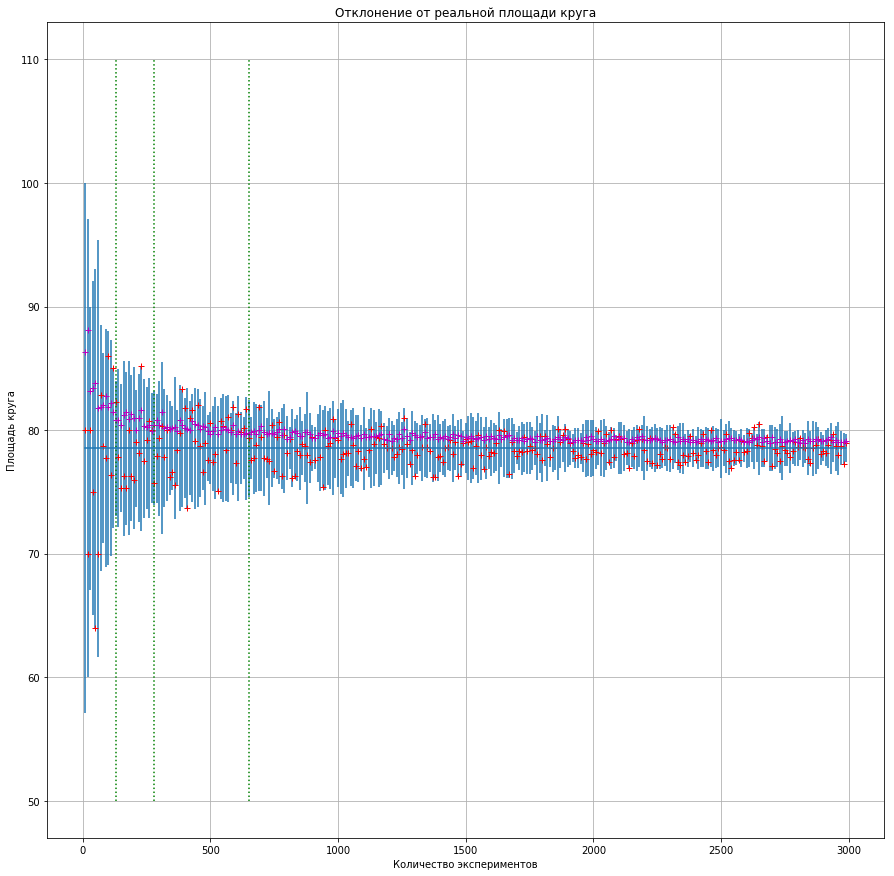

In [45]:
width = 15
height = 15
plt.figure(figsize=(width, height))
plt.yscale('linear')
plt.title('Отклонение от реальной площади круга')
plt.grid(True)
n = plt.plot(x, error_area1, 'r+')
#plt.plot(xx, yy, "c--")
#plt.axes((1, 0, 20, 30), facecolor='w')
plt.errorbar(x, y_fancy, yerr=y)
plt.xlabel('Количество экспериментов')
plt.ylabel('Площадь круга')
plt.plot(x, av_error, "m+")
plt.plot(in_x1, axy, "g:")
plt.plot(in_x2, axy, "g:")
plt.plot(in_x3, axy, "g:")
#plt.plot(x1, func(ans, x1), "r.")

Голубые столбики -- максимальное отклонение, полученное в результате эксперимента

Красные точки -- случайные отклонения

Фиолетовые точки -- усредненные результаты, полученные в ходе нескольких экспериментов